# Exercise Set 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
import os

In [2]:
os.makedirs('media', exist_ok=True)

100%|██████████| 3/3 [02:21<00:00, 47.25s/it]


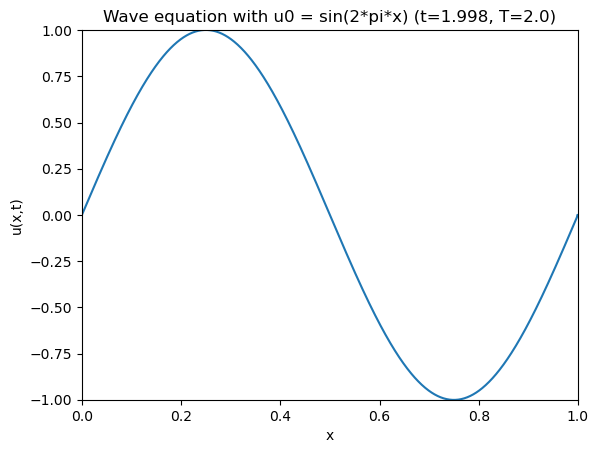

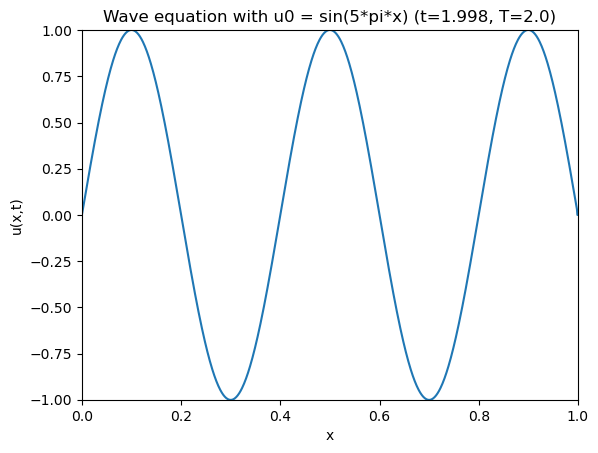

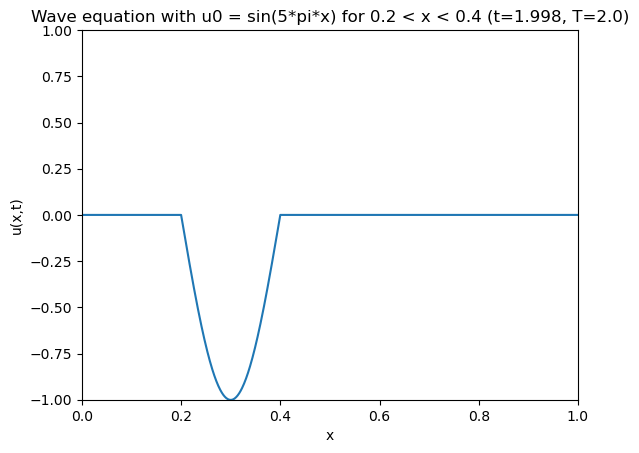

In [23]:
def simulate_wave_equation(u0, L=1.0, c=1.0, T=1.0, dx=0.01, dt=0.001):
    Nx = int(L/dx)+1
    Nt = int(T/dt)+1

    # u(x,t)
    u = np.zeros((Nx, Nt))

    # Initial conditions
    x = np.linspace(0, L, Nx)
    u[:,0] = u0(x) # state at t=0
    u[:,1] = (1+dt)*u[:,0] # state at t=1

    # Stepping through time
    for t in range(2, Nt-1):
        for x in range(1, Nx-2):
            u[x, t] = c**2 * (dt**2)/(dx**2) * (u[x+1, t-1] + u[x-1, t-1] - 2*u[x, t-1]) - u[x, t-2] + 2*u[x, t-1]
        # Physical boundaries at x=0 and x=L
        u[0,:] = 0
        u[-1,:] = 0
    
    return u

def animate_wave_equation(u, title, L=1.0, T=1.0):
    fig, ax = plt.subplots()
    x = np.linspace(0, L, u.shape[0])
    plt.xlim(0, L)
    plt.ylim(-1, 1)
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    line, = ax.plot(x, u[:,0])

    def animate(i):
        line.set_ydata(u[:,i])
        plt.title(title + f' (t={i/u.shape[1]*T:.3f}, T={T})')
        return line,

    anim = animation.FuncAnimation(fig, animate, frames=u.shape[1]-1, blit=True, interval=1000//(u.shape[1]/5), repeat=True)
    anim.save(f'media/{title.strip().replace(" ", "_")}.mp4', writer='ffmpeg')

u0s = [
    lambda x: np.sin(2*np.pi*x),
    lambda x: np.sin(5*np.pi*x),
    lambda x: np.where((0.2 < x) & (x < 0.4), np.sin(5*np.pi*x), 0)
]

u0s_names = [
    'sin(2*pi*x)',
    'sin(5*pi*x)',
    'sin(5*pi*x) for 0.2 < x < 0.4'
]

for x_i, (u0, name) in tqdm(enumerate(zip(u0s, u0s_names)), total=len(u0s)):
    c = simulate_wave_equation(u0, dx=0.001, dt=0.001, T=2.0)
    animate_wave_equation(c, title=f'Wave equation with u0 = {name}', T=2.0)


(10, 10, 1000)


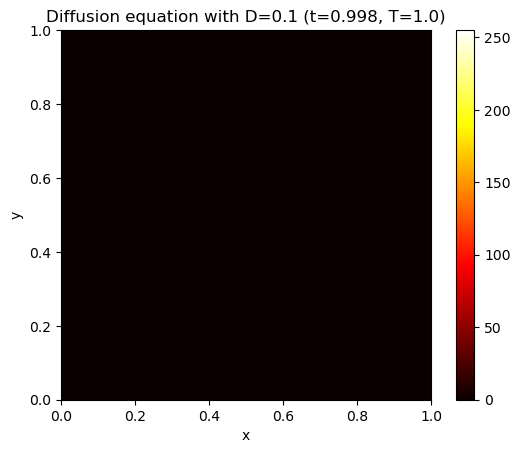

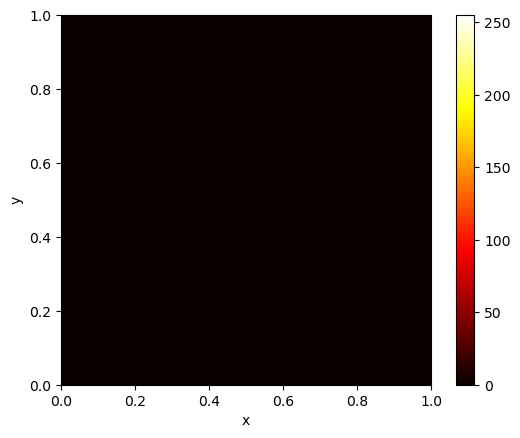

In [59]:
def simulate_diffusion_equation(D=1.0, T=1.0, dx=0.01, dt=0.001):
    Nx = int(1/dx)
    Nt = int(T/dt)

    # u(x,y,t)
    c = np.zeros((Nx, Nx, Nt))
    print(c.shape)

    # Initial conditions
    # c[:,:,0] = 0 # not necessary due to np.zeros initialization
 
    # Physical boundaries at c(x,y=1,t) = 1 and c(x,y=0,t) = 0
    c[:,-1,:] = 1
    c[:,0,:] = 0

    stability = 4 * D * dt / dx**2
    assert stability < 1, f'Stability condition not met: {stability}'

    # Stepping through time
    for t_i in range(1, Nt-2):
        for x_i in range(1, Nx-2):
            for y_i in range(1, Nx-2):
                c[x_i, y_i, t_i] = c[x_i, y_i, t_i-1] + D*dt/dx**2 * (c[x_i+1, y_i, t_i-1] + c[x_i-1, y_i, t_i-1] + c[x_i, y_i+1, t_i-1] + c[x_i, y_i-1, t_i-1] - 4*c[x_i, y_i, t_i-1])
        # Boundary condition that c(x=0,y,t) = c(x=1,y,t)
        c[Nx-1, y_i, t_i] = c[0, y_i, t_i]
    
    return c

def viz_init_grid(c):
    fig, ax = plt.subplots()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('y')
    im = plt.imshow(c[:,:,0]*255, cmap='hot')
    plt.colorbar(im)
    plt.show()

def animate_diffusion_equation(c, title, T=1.0):
    fig, ax = plt.subplots()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    im = plt.imshow(c[:,:,0]*255, cmap='hot')
    plt.colorbar(im)

    def animate(i):
        im.set_data(c[:,:,i]*255)
        plt.title(title + f' (t={i/c.shape[2]*T:.3f}, T={T})')
        return im,

    anim = animation.FuncAnimation(fig, animate, frames=c.shape[2]-1, blit=True, interval=1000//(c.shape[2]/5), repeat=True)
    anim.save(f'media/{title.strip().replace(" ", "_")}.mp4', writer='ffmpeg')

D = 0.1
dx = 0.1
dt = 0.001
T = 1.0
c = simulate_diffusion_equation(D=D, dx=dx, dt=dt, T=T)
animate_diffusion_equation(c, title=f'Diffusion equation with D={D}')
viz_init_grid(c)